In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
pd.options.display.max_rows = None

In [2]:
filepath = 'boat_data.csv'
data = pd.read_csv(filepath, encoding = 'utf-8')

In [3]:
data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


<AxesSubplot:>

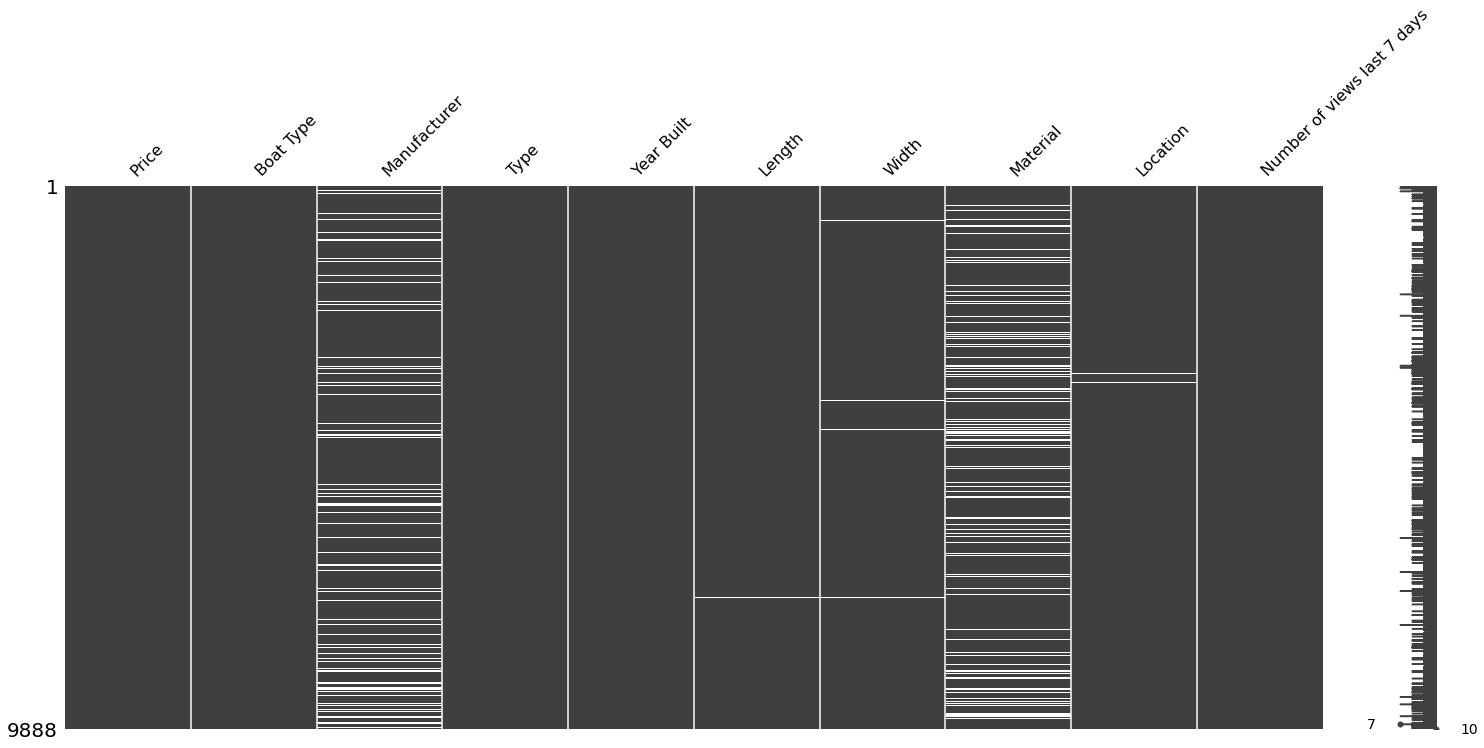

In [4]:
missingno.matrix(data)

In [5]:
data.Price

0           CHF 3337
1           EUR 3490
2           CHF 3770
3          DKK 25900
4           EUR 3399
5           CHF 3650
6           CHF 3600
7          DKK 24800
8           EUR 3333
9           EUR 3300
10          CHF 3500
11          CHF 3480
12          EUR 3500
13          CHF 4600
14          CHF 4500
15          CHF 4400
16          CHF 4380
17         DKK 30000
18          EUR 4000
19          EUR 4000
20          EUR 3999
21          CHF 4267
22          EUR 3930
23          EUR 3900
24          EUR 3900
25          CHF 4200
26          CHF 4200
27          CHF 4030
28          CHF 4000
29          CHF 3975
30          CHF 3950
31          CHF 3900
32          CHF 3890
33          CHF 3850
34          CHF 3800
35          CHF 3800
36          CHF 3800
37          CHF 3790
38          EUR 3500
39          EUR 3500
40          EUR 3500
41           Â£ 5170
42          EUR 5500
43          EUR 5500
44          EUR 5500
45          EUR 5500
46          CHF 5900
47          E

In [6]:
data['Currency'] = data['Price'].apply(lambda x: x.split(' ')[0])
data['Unconverted Price'] = data['Price'].apply(lambda y: y.split(' ')[1]).astype(int)
data = data.drop(['Price'], axis = 1)

In [7]:
data.Currency.unique()

array(['CHF', 'EUR', 'DKK', 'Â£'], dtype=object)

In [8]:
data['Currency'] = data['Currency'].replace('Â£', '£')

In [9]:
data.Currency.value_counts()

EUR    8430
CHF     980
£       298
DKK     180
Name: Currency, dtype: int64

In [10]:
data.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Unconverted Price
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,25900
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399


In [11]:
data['Price'] = np.where(data['Currency'] == 'CHF', data['Unconverted Price'] * 1.08, data['Unconverted Price'])
data['Price'] = np.where(data['Currency'] == 'EUR', data['Unconverted Price'] * 1.13, data['Price'])
data['Price'] = np.where(data['Currency'] == 'DKK', data['Unconverted Price'] * 0.15, data['Price'])
data['Price'] = np.where(data['Currency'] == '£', data['Unconverted Price'] * 1.33, data['Price'])

In [12]:
data.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Unconverted Price,Price
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337,3603.96
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490,3943.70
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770,4071.60
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,25900,3885.00
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399,3840.87


In [13]:
data = data.drop(['Currency', 'Unconverted Price'], axis = 1)

In [14]:
data.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3603.96
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3943.70
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,4071.60
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3885.00
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3840.87


In [15]:
top_10_views = data.groupby('Boat Type')['Number of views last 7 days'].sum().to_frame()
top_10_views.reset_index()

,Boat Type,Number of views last 7 days
0,Bowrider,47183
1,"Bowrider,Cabin Boat,Deck Boat",435
2,"Bowrider,Center console boat,Sport Boat",389
3,"Bowrider,Classic",87
4,"Bowrider,Deck Boat,Water ski",888
5,"Bowrider,Motor Yacht,Sport Boat",2261
6,"Bowrider,Motor Yacht,Wakeboard/Wakesurf",508
7,"Bowrider,Sport Boat,Wakeboard/Wakesurf",628
8,"Bowrider,Wakeboard/Wakesurf",879
9,Cabin Boat,131700


In [16]:
top_10_views['Pct'] = top_10_views['Number of views last 7 days'] * 100 / sum(top_10_views['Number of views last 7 days'])


In [17]:
top_5_views = top_10_views.sort_values(by='Pct', ascending = False).head(5)

In [18]:
top_5_views

,Number of views last 7 days,Pct
Boat Type,,
Motor Yacht,351659,23.842872
Sport Boat,251418,17.046421
Cabin Boat,131700,8.929407
Flybridge,127534,8.646947
Trawler,75456,5.116001


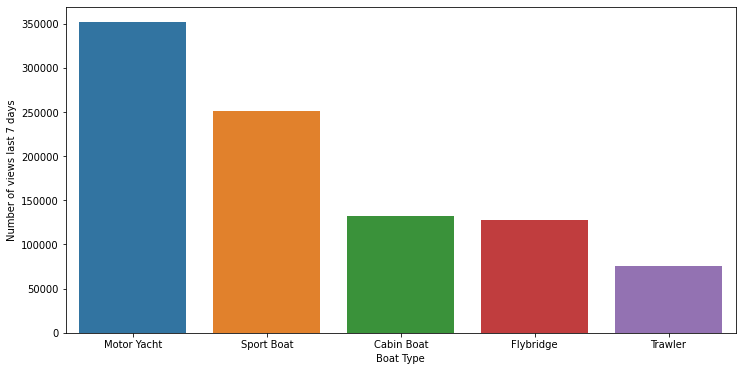

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize = (12, 6))
sns.barplot(x = top_5_views.index, y = 'Number of views last 7 days', data = top_5_views)
plt.show()
plt.savefig('')

In [20]:
data.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3603.96
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3943.70
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,4071.60
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3885.00
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3840.87


<AxesSubplot:>

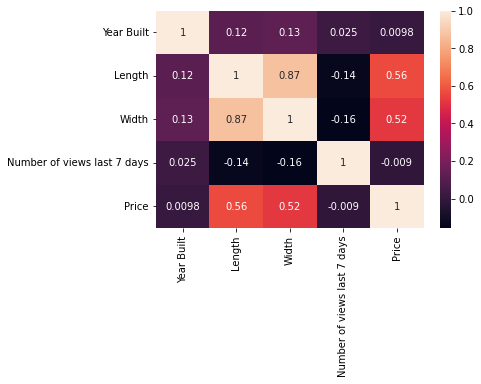

In [21]:
sns.heatmap(data.corr(), annot= True)

- The low correlation score between Number of views last 7 days and Price shows
that any boat have a high price isn't likely to be viewed much.
- Boats with higher length and width are likely to be high-priced by the manufacturer, 
but it seems that small-sized boats are of more interest to buyers, as it's indicated by the correlation score.

In [22]:
data['Price group'] = np.where((data['Price'] > 0) & (data['Price'] <= 10000), 'Less than $10000', data['Price'])
data['Price group'] = np.where((data['Price'] > 10000) & (data['Price'] <= 100000) , '$10000 - $100000', data['Price group'])
data['Price group'] = np.where((data['Price'] > 100000)& (data['Price'] <= 1000000), '$100000 - $1000000', data['Price group'])
data['Price group'] = np.where((data['Price'] > 1000000) & (data['Price'] <= 10000000), '$1000000 - $10000000', data['Price group'])
data['Price group'] = np.where(data['Price'] > 10000000, 'More than $10000000', data['Price group'])

In [23]:
data.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price,Price group
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3603.96,Less than $10000
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3943.70,Less than $10000
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,4071.60,Less than $10000
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3885.00,Less than $10000
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3840.87,Less than $10000


In [24]:
views_price = data.groupby('Price group')['Number of views last 7 days'].sum().sort_values(ascending = False)

In [25]:
views_price

Price group
$10000 - $100000        791232
$100000 - $1000000      546073
$1000000 - $10000000     70602
Less than $10000         61145
More than $10000000       5850
Name: Number of views last 7 days, dtype: int64

<AxesSubplot:xlabel='Number of views last 7 days', ylabel='Price group'>

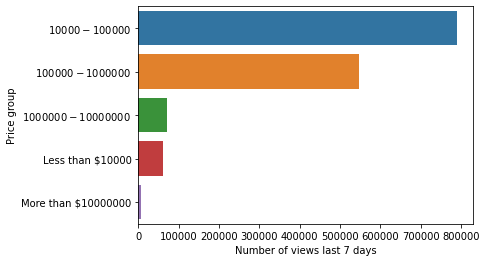

In [26]:
sns.barplot(y = views_price.index, x = views_price, orient = 'h')
# plt.axis('off')
# plt.savefig('price.svg')

- Boats with price fall under 10,000 USD - 100,000 USD category have the highest views. Overall, viewers search more of a boat that's not too cheap or too overpriced.
- This indicates that not the most expensive boats get the highest views. By analysing the data, we can confirm the correctness of the initial assumption.

In [27]:
views_by_type = data.groupby('Type')['Number of views last 7 days'].sum().sort_values(ascending = False).head(3)

In [28]:
views_by_type

Type
Used boat,Diesel      538140
Used boat,Unleaded    408134
Used boat             183563
Name: Number of views last 7 days, dtype: int64

<AxesSubplot:xlabel='Type'>

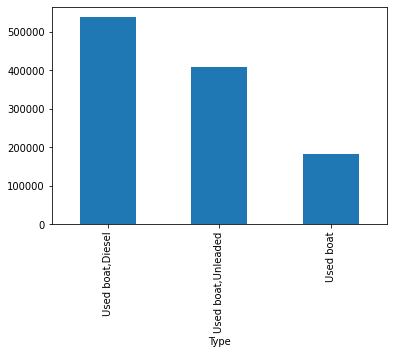

In [29]:
views_by_type.plot.bar()

- Used boats run by Diesel attract most viewers' attention

In [30]:
year_df = data.drop(data[data['Year Built'] == 0].index)

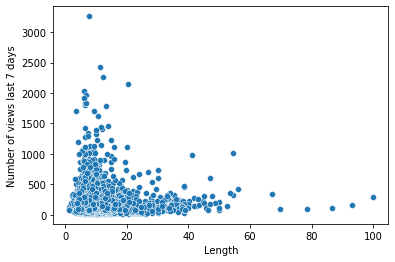

In [31]:
sns.scatterplot(x = 'Length', y= 'Number of views last 7 days', data = data)
# plt.axis('off')
plt.savefig('length.png')

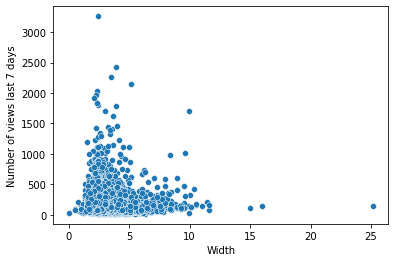

In [32]:
sns.scatterplot(x = 'Width', y = 'Number of views last 7 days', data = data)
# plt.axis('off')
plt.savefig('width.png')

Buyers tend to search for small to medium-sized boats, with length not greater than 40 meters and width not greater than 10 meters. As the size of the boats reduced, the interests from buyers grow higher.

<AxesSubplot:>

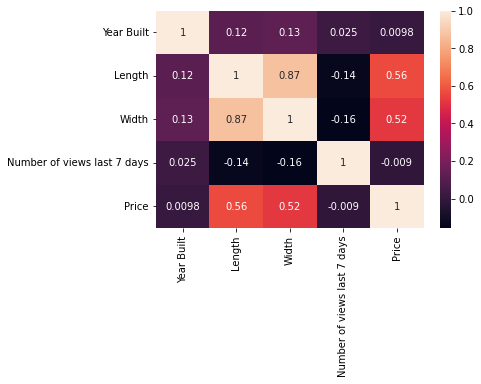

In [33]:
sns.heatmap(data.corr(), annot = True)

In [34]:
material = data.groupby('Material')['Number of views last 7 days'].sum().sort_values(ascending = False) *100 / data['Number of views last 7 days'].sum()

In [35]:
data.groupby('Material')['Number of views last 7 days'].sum().sort_values(ascending = False) 

Material
GRP                    899339
Steel                  125036
PVC                     95968
Wood                    52296
Plastic                 39678
Aluminium               38816
Carbon Fiber             7953
Thermoplastic            3700
Hypalon                   538
Reinforced concrete       169
Rubber                     63
Name: Number of views last 7 days, dtype: int64

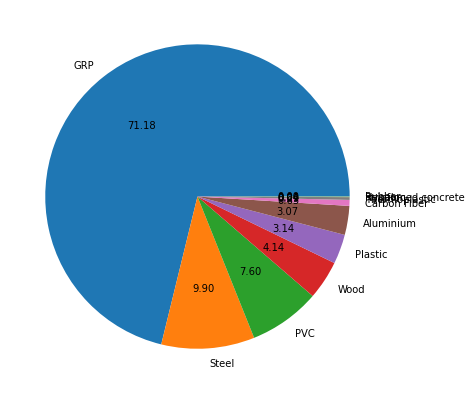

In [36]:
plt.figure(figsize = (12, 7))
plt.pie(material, autopct = '%.2f', labels = material.index)
plt.savefig('material.svg')
plt.show()

- Boats made from GRP (Glass Reinforced Plastic) are all the rage among buyers, with total views from last 7 days 
comes at nearly 900 millions, accounting for 61% percent of total views.

In [37]:
data.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price,Price group
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3603.96,Less than $10000
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3943.70,Less than $10000
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,4071.60,Less than $10000
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3885.00,Less than $10000
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3840.87,Less than $10000


In [38]:
country_df = data[data.Location.notnull()]

In [39]:
country_df['Country'] = country_df['Location'].apply(lambda x: x.split(' ')[0])

C:\Users\dinhd\AppData\Local\Temp/ipykernel_13760/56140493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Country'] = country_df['Location'].apply(lambda x: x.split(' ')[0])


In [40]:
country_df.groupby('Country')['Number of views last 7 days'].sum().sort_values(ascending = False)

Country
Switzerland            374431
Germany                286993
Italy                  209958
Netherlands            121982
France                 118098
Croatia                 94999
Spain                   80914
United                  22857
Denmark                 22355
Austria                 16471
Portugal                15536
Belgium                 11946
Lake                     9340
Greece                   9200
Poland                   7440
Malta                    5927
Turkey                   5112
Finland                  4584
Slovenia                 4537
Sweden                   2644
Neustadt                 2154
Montenegro               1877
Thun                     1831
TravemÃ¼nde              1825
Czech                    1771
Lago                     1769
Donau                    1624
Russian                  1607
Monaco                   1273
Thailand                 1267
Bulgaria                 1140
ZÃ¼richse,               1017
Avenches                  917
Es

In [41]:
country_df.groupby(['Country', 'Boat Type'])['Number of views last 7 days'].sum().sort_values(ascending = False).head(10)

Country      Boat Type  
Switzerland  Sport Boat     99617
Italy        Motor Yacht    63095
Germany      Motor Yacht    62707
             Sport Boat     55154
             Cabin Boat     48098
Croatia      Motor Yacht    46631
Switzerland  Motor Yacht    42038
Netherlands  Trawler        40822
Switzerland  Cabin Boat     38052
Italy        Flybridge      33439
Name: Number of views last 7 days, dtype: int64

Boats from Switzerland, Italy and Germany draws the highest attention from seekers, as they are the primary manufacturers
of Sport Boat and Motor Yacht, the two most sought type of boats amongst others.

In [42]:
data.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price,Price group
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3603.96,Less than $10000
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3943.70,Less than $10000
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,4071.60,Less than $10000
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3885.00,Less than $10000
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3840.87,Less than $10000


In [53]:
data.groupby(['Boat Type', 'Type', 'Year Built', 'Length', 'Width', 'Material', 'Price group'])['Number of views last 7 days'].sum().sort_values(ascending = False).to_frame().head(5)

,,,,,,,Number of views last 7 days
Boat Type,Type,Year Built,Length,Width,Material,Price group,
Motor Yacht,"Used boat,Unleaded",1992,7.70,2.46,Plastic,$10000 - $100000,3263
Hardtop,"Used boat,Diesel",1979,11.12,3.88,GRP,$10000 - $100000,2432
"Bowrider,Motor Yacht,Sport Boat","Used boat,Diesel",2002,12.35,3.48,GRP,$100000 - $1000000,2261
Hardtop,"Used boat,Diesel",2009,20.30,5.20,GRP,$1000000 - $10000000,2154
Sport Boat,"Used boat,Unleaded",1993,6.14,2.34,Plastic,$10000 - $100000,2026


In [54]:
data.groupby(['Type', 'Price group'])['Price group'].count().sort_values(ascending = False).to_frame().head()

,,Price group
Type,Price group,
"Used boat,Diesel",$100000 - $1000000,2627
"Used boat,Unleaded",$10000 - $100000,1303
"Used boat,Diesel",$10000 - $100000,1108
"new boat from stock,Unleaded",$10000 - $100000,768
Used boat,$100000 - $1000000,693


<AxesSubplot:xlabel='Price', ylabel='Type'>

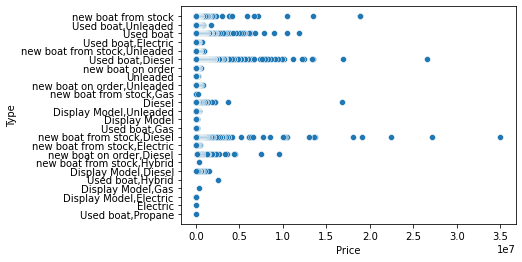

In [55]:
sns.scatterplot(x = 'Price', y= 'Type', data = data)

In [56]:
type_df = data[data['Type'].notnull()]

In [57]:
type_df['condition'] = type_df['Type'].apply(lambda x: x.split(',')[0])
type_df['engine'] = type_df['Type'].apply(lambda x: x.split(',')[1:])

C:\Users\dinhd\AppData\Local\Temp/ipykernel_13760/3637085727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df['condition'] = type_df['Type'].apply(lambda x: x.split(',')[0])
C:\Users\dinhd\AppData\Local\Temp/ipykernel_13760/3637085727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df['engine'] = type_df['Type'].apply(lambda x: x.split(',')[1:])


In [58]:
new_engine = [' '.join(l) for l in type_df['engine']]
type_df['new_engine'] = new_engine

C:\Users\dinhd\AppData\Local\Temp/ipykernel_13760/2750178481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df['new_engine'] = new_engine


<AxesSubplot:xlabel='Number of views last 7 days', ylabel='condition'>

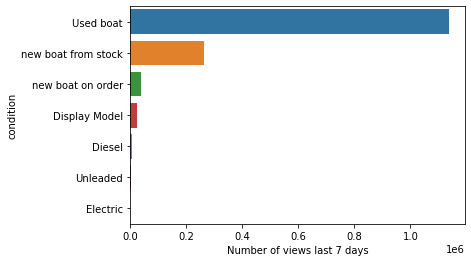

In [59]:
type_views = type_df.groupby('condition')['Number of views last 7 days'].sum().sort_values(ascending = False)
sns.barplot(x = type_views, y= type_views.index, orient = 'h')

In [60]:
type_views

condition
Used boat              1136819
new boat from stock     262363
new boat on order        40373
Display Model            23541
Diesel                    7127
Unleaded                  3760
Electric                   167
Name: Number of views last 7 days, dtype: int64

In [61]:
type_df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price,Price group,condition,engine,new_engine
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3603.96,Less than $10000,new boat from stock,[],
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3943.70,Less than $10000,new boat from stock,[],
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,4071.60,Less than $10000,new boat from stock,[],
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3885.00,Less than $10000,new boat from stock,[],
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3840.87,Less than $10000,new boat from stock,[],


In [62]:
df = type_df.groupby(['condition', 'new_engine', 'Year Built'])['Number of views last 7 days'].sum().to_frame()

In [63]:
df.reset_index(inplace = True)

In [68]:
df = df[(df['condition'] == 'Used boat') & (df['new_engine'].isin(['Diesel', 'Unleaded']))]
df.drop(df[df['Year Built'] == 0].index, inplace = True)

In [69]:
df.sort_values(by = ['Number of views last 7 days', 'Year Built'], ascending = False).head(10)

,condition,new_engine,Year Built,Number of views last 7 days
283,Used boat,Diesel,2008,30865
281,Used boat,Diesel,2006,29872
282,Used boat,Diesel,2007,26941
279,Used boat,Diesel,2004,24668
284,Used boat,Diesel,2009,22033
280,Used boat,Diesel,2005,18897
277,Used boat,Diesel,2002,18749
278,Used boat,Diesel,2003,18306
276,Used boat,Diesel,2001,17364
285,Used boat,Diesel,2010,16958


<AxesSubplot:xlabel='Year Built', ylabel='Number of views last 7 days'>

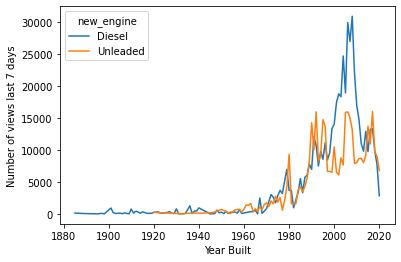

In [67]:
sns.lineplot(x = 'Year Built', y = 'Number of views last 7 days', hue = 'new_engine', data = df[df['condition'] == 'Used boat'])
# sns.lineplot(x = 'Year Built', y = 'Number of views last 7 days', data = df[df['condition'] == 'new boat from stock'])
# plt.axis('off')
# plt.savefig('type.svg')